# Exploratory Data Analysis with tidyverse and ggplot2

## Introduction and Objectives
- Perform exploratory data analysis in R using tidyverse and the ggplot2 R packages.
- Do some minor data preparation on the `seoul_bike_sharing` dataset.
- Generate and explore statistics from the resulting dataframe and make observations.
- Generate plots using the `ggplot2` library.
- Gather insights from the exploratory analysis.

### Visualisation
Visualisation is powerful for better understanding data and finding patterns within it.

**Scatterplots**\
**Scatterplots** can display correlation between two features.

**Highly correlatated** features vary in similar ways. **Correlation** does not imply **causation** but may point where to look.

**Covariates** indicate that one variable 'explains' the variation in the other. This could be due to a **causal relationship** between the covariates, a **confounder** (another factor which causes both covariates to respond to variations) or a **random coincidence**.

Either way, the behaviour of one variable can be used to predict the behaviour of the other. However, in the **causal** case, influencing the first variable has a corresponding causal influence on the second.

**Boxplots**\
**Boxplots** can help spot **outliers** and **anomalous behaviour** in features.

**Other visualisations**\
**Line plots** and **maps** can also provide insights about any clear trends and anomalies that may be present in a variable. **Time series** and **spatial data** are particularly interesting kinds of variables.

**Outliers and patterns**\
**Outliers** can easily consume the range of a plot, making the data look like a featureless flat line in comparison to these points. **Outlier removal** may be required for clarity. In other cases, it is important to consider outliers as an important part of the date, e.g. anomaly detection.

It is important to be skeptical about any apparent **patterns**, especially in smaller datasets. **'Big data'** provides an advantage in that any patterns that emerge in very large datasets are far more likely to persist on unseen data than those found in small datasets.

### Reference: `seoul_bike_sharing` dataset variables:

- `DATE`: format - `"2017-12-01"`
- `RENTED_BIKE_COUNT`: Count of bikes rented at each hour
- `HOUR`: Hour of the day
- `TEMPERATURE`: Celsius
- `HUMIDITY`: %
- `Windspeed`: m/s
- `VISIBILITY`: 10m
- `DEW_POINT_TEMPERATURE`: Celsius
- `SOLAR_RADIATION`: MJ/m2
- `RAINFALL`: mm
- `SNOWFALL`: cm
- `SEASONS`:  `"Autumn"`, `"Spring"`, `"Summer"`, `"Winter"`
- `HOLIDAY`: `"Holiday"`, `"No holiday"`
- `FUNCTIONING_DAY`: `"Yes"`, `"No"`

## Data import and cleaning

### 1. Load required libraries and the dataset

- Load the `seoul_bike_sharing` data from the provided URL into a dataframe.
- The dataset is already clean, but you will still need a review of data types, especially dates, which may to be coerced. 
- Ensure that any categorical variables are typed as factors. 

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0     v purrr   1.0.1
v tibble  3.1.8     v dplyr   1.1.0
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.3     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Ensure you read `DATE` as type `character`.

In [2]:
filename <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"
seoul_bike_sharing <- read_csv(filename, col_types = cols('DATE' = col_character()))
head(seoul_bike_sharing)

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### 2. Recast `DATE` as a date
Use the format of the data, namely "%d/%m/%Y".

In [3]:
seoul_bike_sharing$DATE <- as.Date(seoul_bike_sharing$DATE, "%d/%m/%Y")
head(seoul_bike_sharing)

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### 3. Cast `HOURS` as a categorical variable

Also, coerce its levels to be an ordered sequence. This is to ensure that visualisations correctly utilize `HOURS` as a discrete variable with the expected ordering.  

In [4]:
seoul_bike_sharing$HOUR <- seoul_bike_sharing$HOUR %>% as.factor()
head(seoul_bike_sharing)

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<date>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### 4. Check the structure of the dataframe

In [5]:
str(seoul_bike_sharing)

spc_tbl_ [8,465 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...

### 5. Ensure there are no missing values

In [6]:
sum(is.na(seoul_bike_sharing))

[1] 0

## Descriptive Statistics

Review some high level statistics of the `seoul_bike_sharing` dataset. 

### 1. Dataset Summary

Use the `summary()` function to describe the `seoul_bike_sharing` dataset.

In [7]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

Obtain a count of records for each season.

In [8]:
seoul_bike_sharing %>%
    count(SEASONS)

SEASONS,n
<chr>,<int>
Autumn,1937
Spring,2160
Summer,2208
Winter,2160


#### Initial Observations:
- A review of `DATE` indicates that there is exactly a full year of data.  
- No records have zero bike counts.  
- Spring and Winter have the same count of records. Autumn has the least while  Summer has the most.
- Temperature has a large range and, therefore, might explain at least some of the variation in bike rentals.  
- Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
- The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze. (**Beaufort Wind Scale**)  

Exploratory Data Analysis can suggest directions for further exploration and analysis. 

### 2. Calculate the total number of Holidays.

In [9]:
seoul_bike_sharing %>% count(HOLIDAY)

print(paste(sum(seoul_bike_sharing$HOLIDAY == "Holiday"), "holidays"))

HOLIDAY,n
<chr>,<int>
Holiday,408
No Holiday,8057


[1] "408 holidays"


### 3. Calculate the percentage of records that fall on a holiday.

In [10]:
# percent_hols <- sum(seoul_bike_sharing$HOLIDAY == "Holiday") / nrow(seoul_bike_sharing) * 100
# percent_hols <- sum(seoul_bike_sharing$HOLIDAY == "Holiday") / sum(seoul_bike_sharing$HOLIDAY != "")) * 100

percent_hols <- sum(seoul_bike_sharing$HOLIDAY == "Holiday") / sum(!is.na(seoul_bike_sharing$HOLIDAY)) * 100

print(paste(round(percent_hols, 2), "%", sep=""))

[1] "4.82%"


### 4. Determine the **expected** and **actual** number of records in a full year of data

In [11]:
print(paste("Expected =", 365 * 24))
print(paste("Actual =", nrow(seoul_bike_sharing)))

[1] "Expected = 8760"
[1] "Actual = 8465"


### 5. Determine the number of records for `FUNCTIONING_DAY` without missing values.

In [12]:
# provide your solution here
sum(!is.na(seoul_bike_sharing$FUNCTIONING_DAY))

[1] 8465

### 6. Drill down to calculate seasonally aggregated measures to provide more context.

Summarise the total rainfall and snowfall by season.

In [13]:
# provide your solution here
seoul_bike_sharing %>%
    group_by(SEASONS) %>%
    summarize(total_rainfall = sum(RAINFALL), total_snowfall = sum(SNOWFALL))

SEASONS,total_rainfall,total_snowfall
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


## Data Visualization

The main variable of interest is `RENTED_BIKE_COUNT`. It is the key _measure_ or _dependent variable_ in the analysis.  

As a measured quantity, it is expected to depend on factors such as the expected weather. If the immediate or forecasted weather is inclement, people would likely choose to use alternative means of transit or wait for better weather rather than rent a bike. Conversely, pleasant weather conditions would be likely to encourage people to use the bike sharing service.  

The weather is largely infuenced by the time of day and the seasons, so these are also factors.

The time of day, the day of week, and holidays also matter because they control commuting schedules.  

Finer granularity data such as a unique ID for each bike and/or rider, when and where each bike was rented, or even finer, e.g. a history of when and where each bike was used or idle, would be interesting as well. However, this would need to be balanced against the ethics of data collection, regulatory requirements, privacy concerns. Any collection of data at this level of detail would require tokenisation and anonymisation.

`ggplot` is already imported as part of loading `tidyverse`.

### 1. Scatter plot: `RENTED_BIKE_COUNT` vs `DATE`.

This variable is a time series and is plotted against `DATE`.

The opacity is tuned using `alpha` to prevent the points from obscuring each other.

`geom_smooth()` using formula = 'y ~ x'


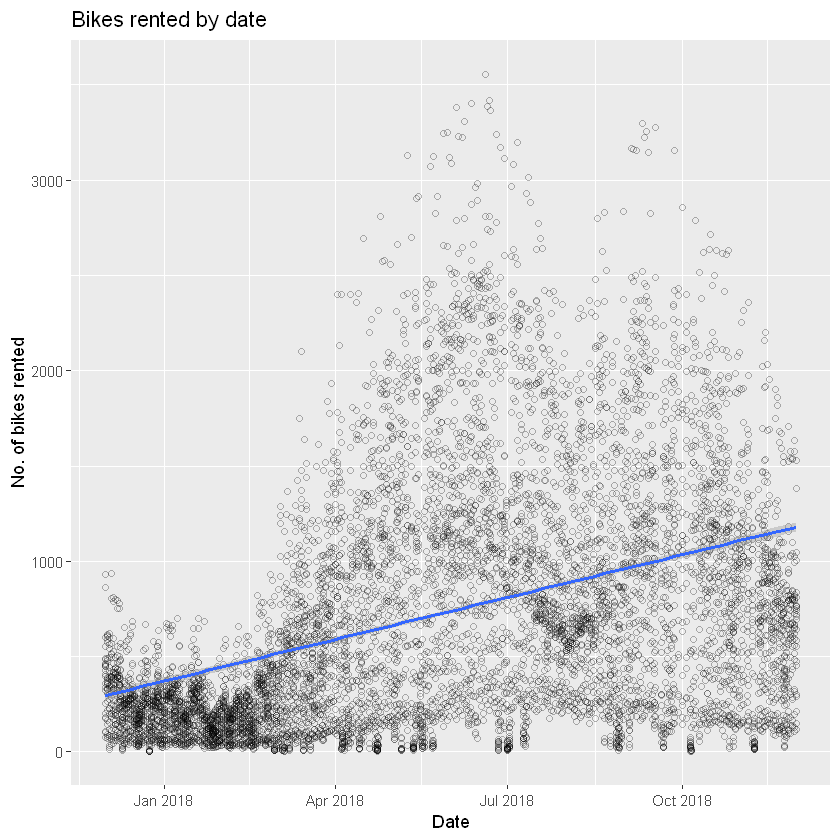

In [15]:
ggplot(data = seoul_bike_sharing, mapping = aes(x = DATE, y = RENTED_BIKE_COUNT)) +
    geom_point(shape = 1, alpha = 0.3) +
    geom_smooth(method = "lm", na.rm = TRUE) +
    labs(title = "Bikes rented by date",
        x = "Date", y = "No. of bikes rented")

#### Create the same plot of the `RENTED_BIKE_COUNT` time series, using `HOUR` as the colour.

Colour coding allows visualising usage by time of day.

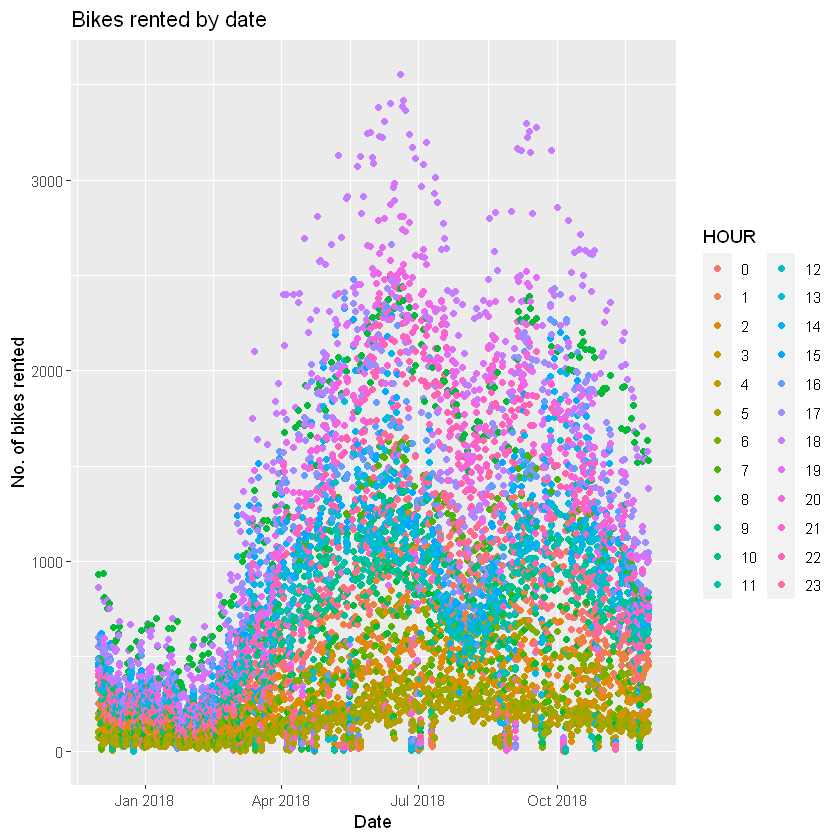

In [16]:
ggplot(data = seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = HOUR), alpha = 0.3) +
    geom_point() +
    labs(title = "Bikes rented by date",
        x = "Date", y = "No. of bikes rented")

#### Emerging patterns and trends

Without the benefit of prior or subsequent data, it may be assumed from the chart that:
1. Demand is lowest earlier in the year and increases gradually, as is demonstrated by adding a linear regression line.
2. However, there are two spikes, one around June and another around September, which could be accounted for by holidays and tourism.
3. The increase in demand during the spikes seems to have a big contribution from the later hours in the day.
4. Demand reduces closer to December and seems to be minimum during January and February, which could possibly be accounted for by cold weather and a preference for other modes of transport.

### 2. Distributions: Histogram overlaid with a kernel density curve

The histogram is normalised the histogram so the y axis represents 'density'. This done by setting `y=..density..` in the aesthetics of the histogram.

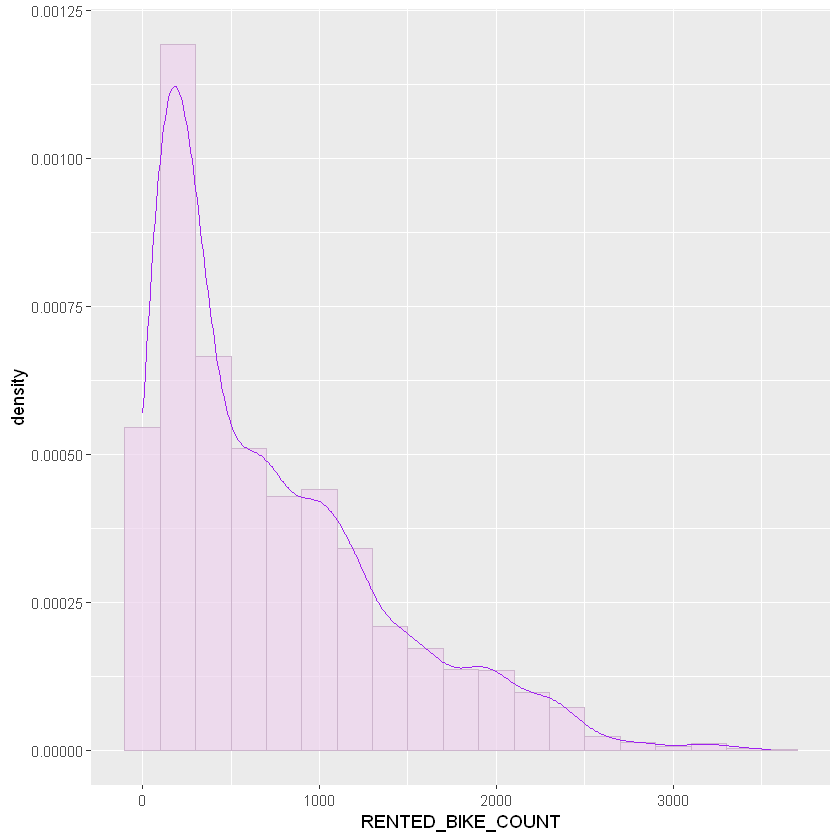

In [17]:
ggplot(seoul_bike_sharing, mapping = aes(x = RENTED_BIKE_COUNT, y = after_stat(density))) + # y = ..density.. has been deprecated
    geom_histogram(binwidth = 200, fill = "thistle2", color = "thistle3", alpha = 0.7) +
    geom_density(color = "purple")

#### Patterns apparent from the distribution

1. Few bikes are rented most of the time.
2. The distribution is skewed to the right, and the mode is between 200 and 300. This is the most frequent number of bikes rented.
3. On occasion, a high number of bikes gets rented (based on the tail of the distribution.)

### 3. Correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE`, faceted by `SEASONS`.

Four plots are generated, corresponding to the `SEASONS` by adding a `facet_wrap()` layer. Colour and opacity emphasize any patterns that emerge, using `HOUR` as the color.

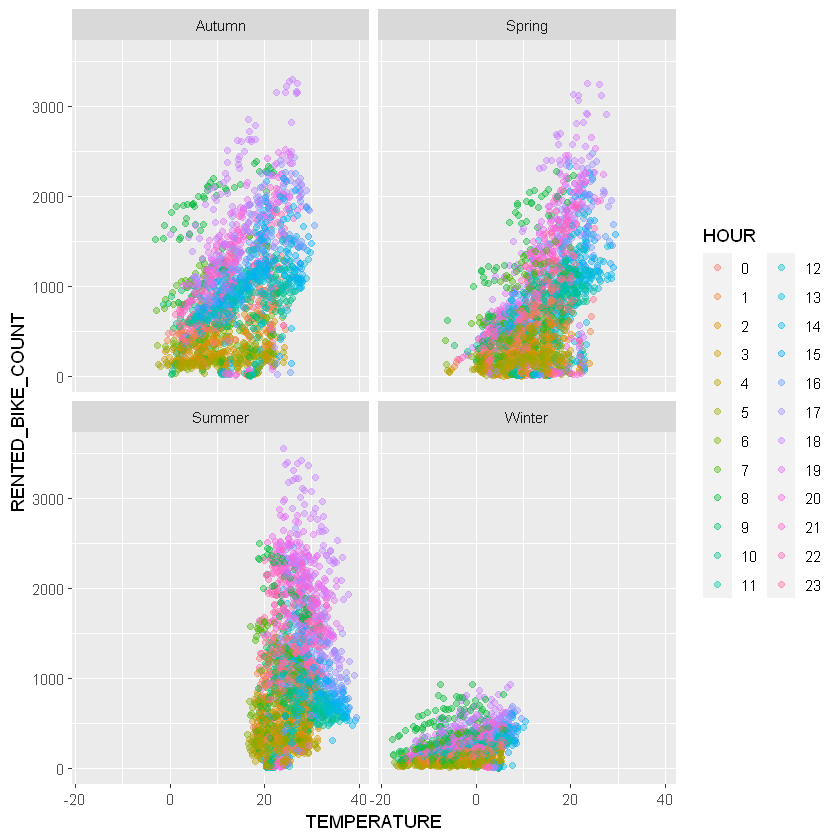

In [18]:
ggplot(seoul_bike_sharing, aes(x=TEMPERATURE, y=RENTED_BIKE_COUNT, colour=HOUR)) +
    geom_point(alpha = 0.4) +
    facet_wrap(.~SEASONS)

#### Patterns apparent from the plot

1. Bike rentals are higher in Spring, Summer and Autumn, when the temperatures are higher.
2. Superficially, there is a positive linear correlation with temperature. However, if explored in more detail, there seems to be a positive correlation with temperature upto around 25 degree C, above which rentals reduce, which would correspond comfortable ambient temperatures and sunlight.
3. Rentals fall sharply in winter and there is a positive correlation with themperature.

Therefore, seasonality is an important predictor of bike rentals.

### 4. Correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE`, without faceting

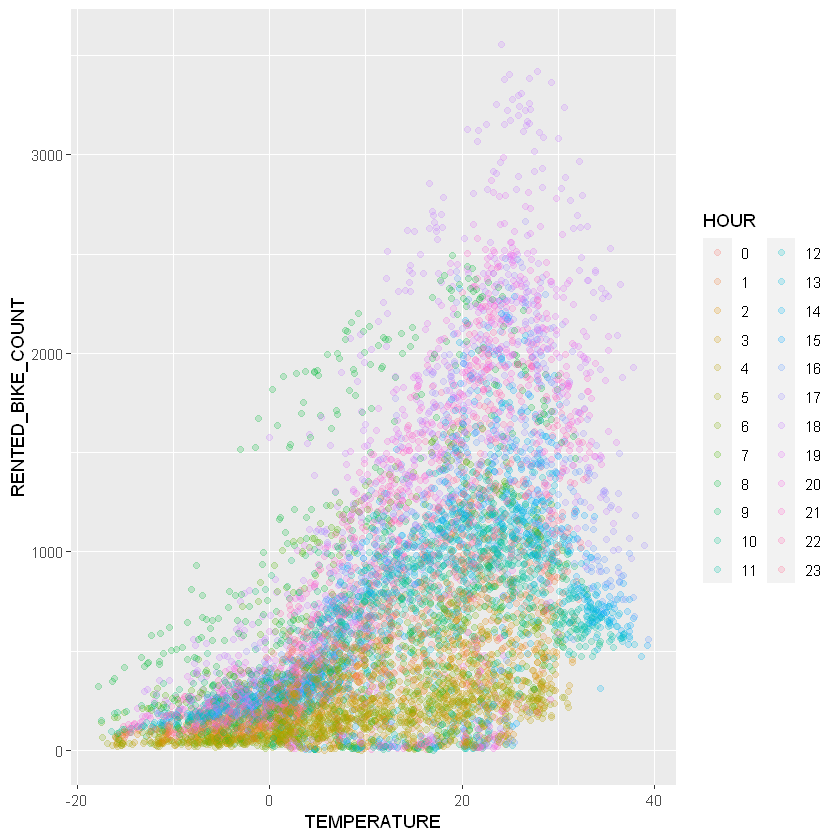

In [19]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)

This plot and its comparison with the plot faceted by `SEASONS` demonstrates the importance of seasonality in explaining bike rental demand.

### 5. Outliers (boxplot): `RENTED_BIKE_COUNT` vs. `HOUR`, faceted by `SEASONS`.

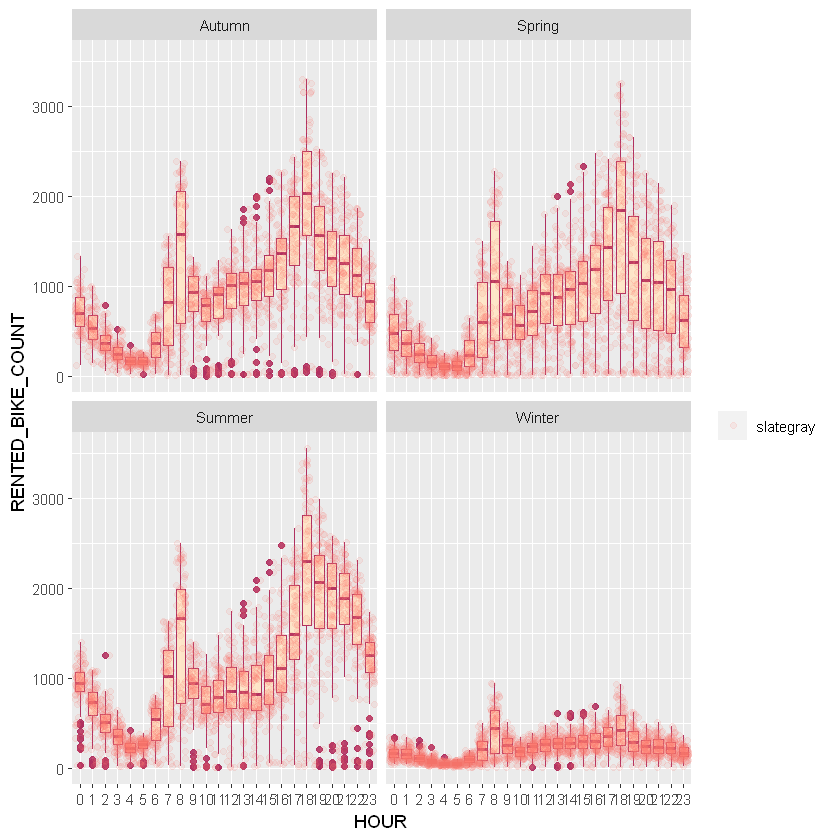

In [20]:
ggplot(seoul_bike_sharing, mapping = aes(x = HOUR, y= RENTED_BIKE_COUNT)) +
    geom_boxplot(fill = "bisque", color = "maroon", alpha = 0.9) +
    geom_jitter(aes(color = "slategray"), alpha=0.1) +
    labs(colour = "") +
    facet_wrap(.~SEASONS)

#### Patterns apparent from the plot

1. Usage peaks at 0800h and 1800h, possibly associated with commuting to and from work.
2. Usage reduces significantly in winter.
3. Peak hours are the same across seasons.
4. There are some low outliers in the evenings in autumn and at night in the summer, which could possibly be due to bad weather.
5. Conversely, there seem to be high outliers in the early afternoons for all seasons.

### 6. Barplot: Total daily rainfall and snowfall

The `RAINFALL` and `SNOWFALL` data are grouped by `DATE`, and `summarize()` is used to calculate the daily total rainfall and snowfall.

In [21]:
# provide your solution here
seoul_daily_precipitation <- seoul_bike_sharing %>%
    group_by(DATE) %>%
    summarize(TOTAL_DAILY_RAINFALL = sum(RAINFALL), TOTAL_DAILY_SNOWFALL = sum(SNOWFALL))

head(seoul_daily_precipitation)

DATE,TOTAL_DAILY_RAINFALL,TOTAL_DAILY_SNOWFALL
<date>,<dbl>,<dbl>
2017-12-01,0.0,0.0
2017-12-02,0.0,0.0
2017-12-03,4.0,0.0
2017-12-04,0.1,0.0
2017-12-05,0.0,0.0
2017-12-06,1.3,8.6


#### Total Daily Rainfall

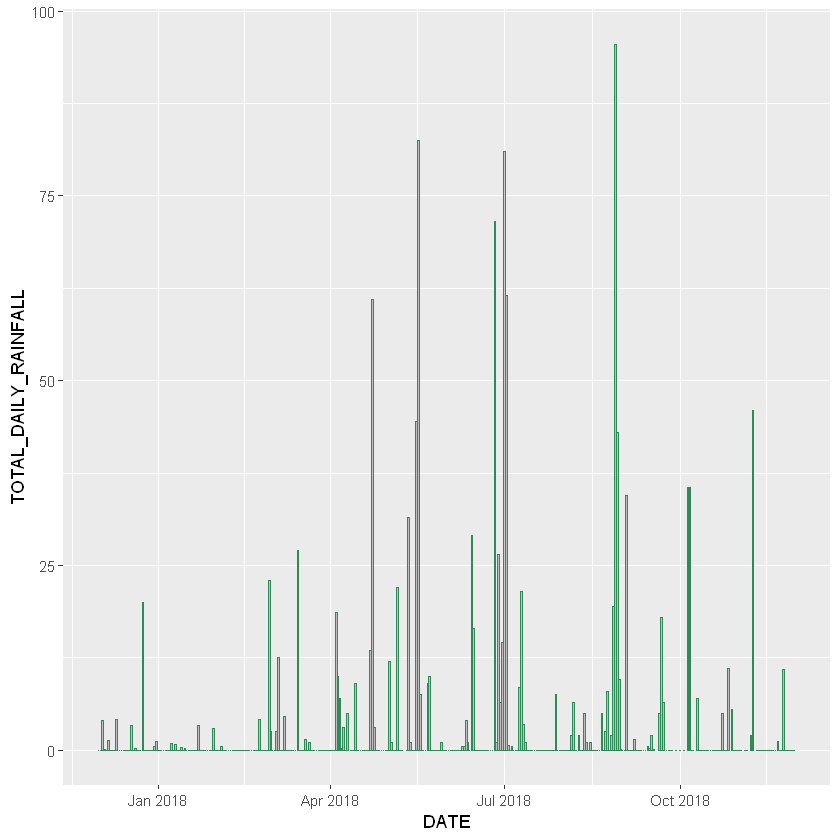

In [22]:
ggplot(seoul_daily_precipitation, aes(x = DATE, y = TOTAL_DAILY_RAINFALL)) +
    geom_bar(stat = "identity", color = "seagreen4", alpha = 0.3)

#### Total Daily Snowfall

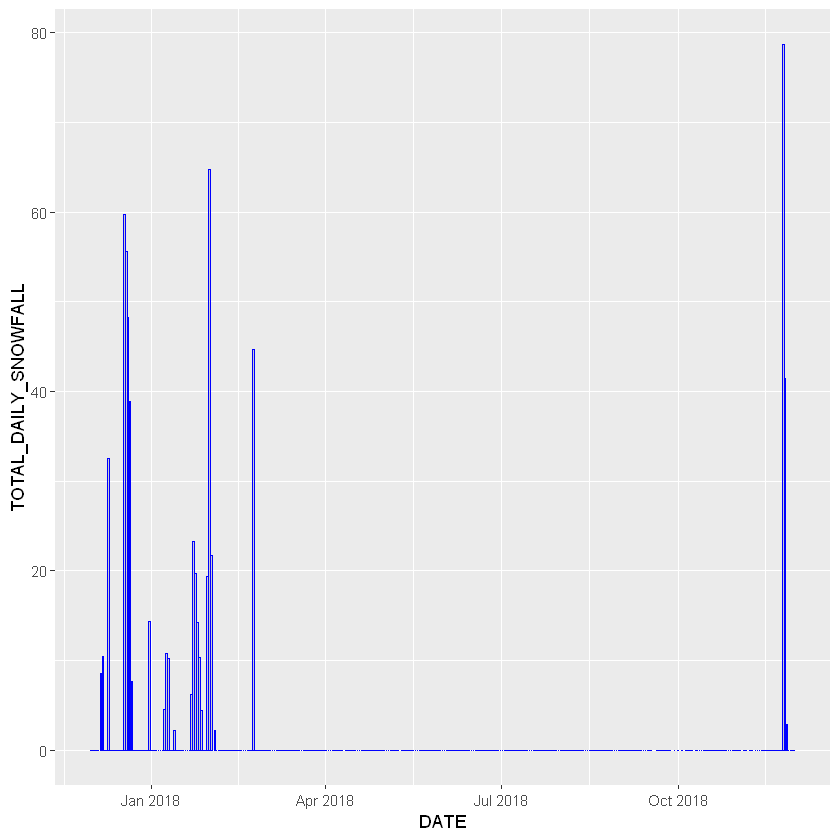

In [23]:
ggplot(seoul_daily_precipitation, aes(x = DATE, y = TOTAL_DAILY_SNOWFALL)) +
    geom_bar(stat = "identity", color = "blue", alpha = 0.2)

### 7. Determine the number of days with snowfall

In [24]:
# sum(seoul_daily_precipitation$TOTAL_DAILY_SNOWFALL != 0)

seoul_daily_precipitation %>%
    filter(TOTAL_DAILY_SNOWFALL != 0) %>%
    count()

n
<int>
27
